# Burn Injury Image Segmentation with Deep Learning

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

### Load/Clean/Scale Data

In [2]:
data_dir = 'data' 

In [3]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [4]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Issue with image data/1/.ipynb_checkpoints


In [5]:
data = tf.keras.utils.image_dataset_from_directory('data')
data = data.map(lambda x,y: (x/255, y))

Found 191 files belonging to 3 classes.


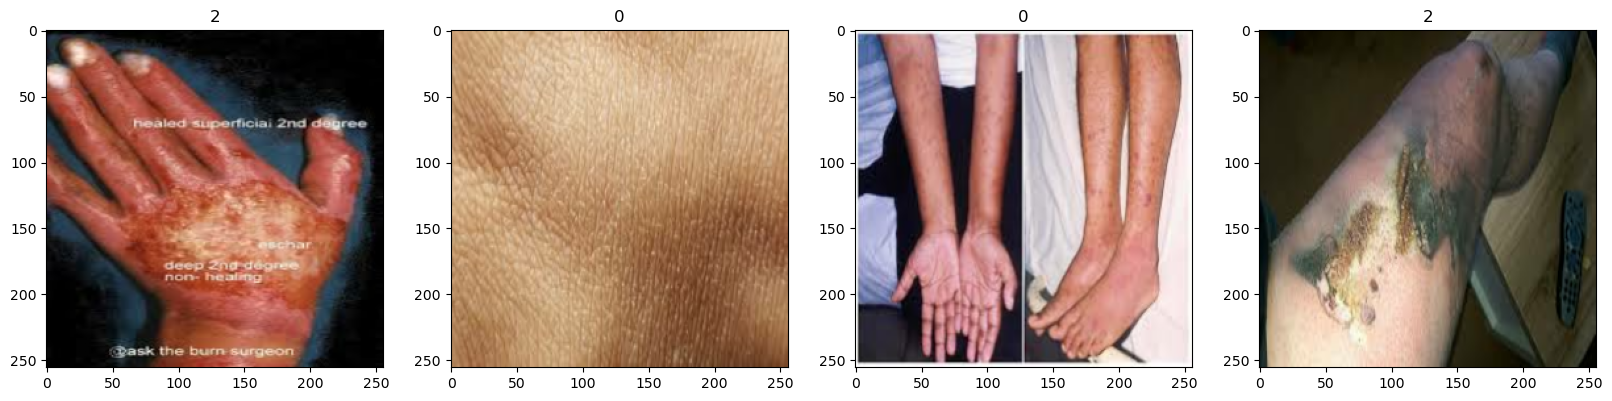

In [6]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### Split Data

In [7]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [8]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### Build Model

In [9]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,3)))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))     
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [10]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

### Train Model

In [12]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [13]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 6s 1s/step - loss: 3.2064 - accuracy: 0.3203 - val_loss: 1.0769 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 1.0516 - accuracy: 0.4453 - val_loss: 1.1539 - val_accuracy: 0.2812
Epoch 3/20
4/4 [==============================] - 5s 1s/step - loss: 1.0355 - accuracy: 0.3984 - val_loss: 0.8548 - val_accuracy: 0.5625
Epoch 4/20
4/4 [==============================] - 5s 1s/step - loss: 1.0191 - accuracy: 0.4688 - val_loss: 1.0248 - val_accuracy: 0.4062
Epoch 5/20
4/4 [==============================] - 5s 1s/step - loss: 0.9391 - accuracy: 0.5469 - val_loss: 0.8890 - val_accuracy: 0.5938
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 0.8285 - accuracy: 0.6172 - val_loss: 1.0066 - val_accuracy: 0.5000
Epoch 7/20
4/4 [==============================] - 5s 1s/step - loss: 0.8459 - accuracy: 0.5938 - val_loss: 0.7018 - val_accuracy: 0.6562
Epoch 8/20
4/4 [=========================

### Evaluate/Test Model

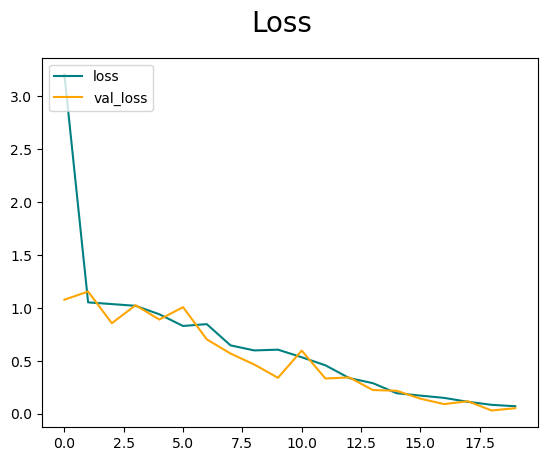

In [14]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

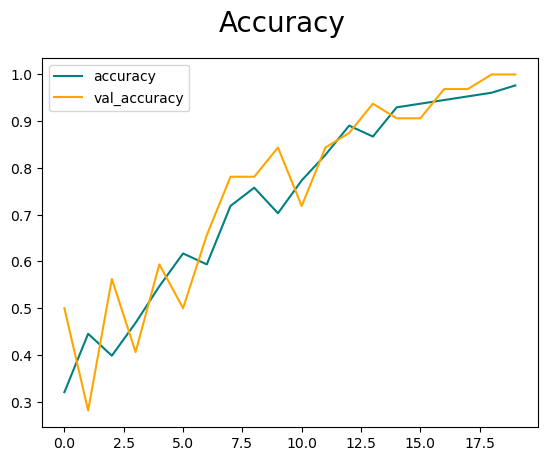

In [15]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [16]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    testloss, testacc = model.evaluate(X, y)

1/1 [==============================] - 0s 251ms/step - loss: 0.0590 - accuracy: 1.0000


### Save Model

In [17]:
from tensorflow.keras.models import load_model

In [18]:
model.save(os.path.join('models','BurnInjuryImageSegmentation.h5'))
new_model = load_model(os.path.join('models','BurnInjuryImageSegmentation.h5'))

/Users/samiahmad/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
